In [157]:
from sklearn.decomposition import FactorAnalysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Load the data

In [105]:
mydata = pd.read_csv('vehicle.csv')
#mydata = pd.read_excel("PCAHealthdata.xlsx", sheet_name='Sheet1')

In [106]:
mydata.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [107]:
mydata.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [108]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
mydata['class'] = labelencoder.fit_transform(mydata['class'])
mydata.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,0
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,0
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,2
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,2
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,1


In [109]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


# Null Value treatment

In [110]:
mydata.info()
#talks about null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [111]:
missing_values=mydata.columns[mydata.isnull().any()]
mydata[missing_values].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [112]:
mydata[mydata.isnull().any(axis=1)][missing_values].head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
5,NaN,106.0,172.0,50.0,255.0,26.0,28.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0
9,44.0,98.0,NaN,62.0,183.0,36.0,22.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0
19,56.0,100.0,215.0,NaN,208.0,32.0,24.0,227.0,651.0,223.0,74.0,6.0,5.0,186.0
35,46.0,NaN,172.0,67.0,157.0,43.0,20.0,170.0,363.0,184.0,67.0,17.0,7.0,192.0
66,43.0,68.0,125.0,57.0,149.0,46.0,19.0,169.0,323.0,172.0,NaN,NaN,18.0,179.0


In [113]:
mydata1 = mydata.copy()
mydata1 = mydata1.fillna(mydata1.median()).astype(int)

In [114]:
missing_values=mydata1.columns[mydata1.isnull().any()]
mydata1[missing_values].isnull().sum()

Series([], dtype: float64)

In [115]:
mydata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null int64
distance_circularity           846 non-null int64
radius_ratio                   846 non-null int64
pr.axis_aspect_ratio           846 non-null int64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null int64
elongatedness                  846 non-null int64
pr.axis_rectangularity         846 non-null int64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null int64
scaled_variance.1              846 non-null int64
scaled_radius_of_gyration      846 non-null int64
scaled_radius_of_gyration.1    846 non-null int64
skewness_about                 846 non-null int64
skewness_about.1               846 non-null int64
skewness_about.2               846 non-null int64
hollows_ratio                  846 non-null i

# Outliers

In [116]:
#mydata1[['compactness']].boxplot()
#mydata1[['circularity']].boxplot()
#mydata1[['distance_circularity']].boxplot()
#mydata1[['radius_ratio']].boxplot()  #HAS OUTLIERS
#mydata1[['pr.axis_aspect_ratio']].boxplot()  #HAS OUTLIERS
#mydata1[['max.length_aspect_ratio']].boxplot() #HAS OUTLIERS
#mydata1[['scatter_ratio']].boxplot()
#mydata1[['elongatedness']].boxplot()
#mydata1[['pr.axis_rectangularity']].boxplot()
#mydata1[['max.length_rectangularity']].boxplot()
#mydata1[['scaled_variance']].boxplot() #HAS OUTLIERS
#mydata1[['scaled_variance.1']].boxplot() #HAS OUTLIERS
#mydata1[['scaled_radius_of_gyration']].boxplot()
#mydata1[['scaled_radius_of_gyration.1']].boxplot() #HAS OUTLIERS
#mydata1[['skewness_about.1']].boxplot()#HAS OUTLIERS  
#mydata1[['skewness_about.2']].boxplot()
#mydata1[['hollows_ratio']].boxplot()

In [117]:
mydata1 = mydata1.mask(mydata1.sub(mydata1.mean()).div(mydata1.std()).abs().gt(2))

In [118]:
print(mydata1.isnull().sum())
print(mydata1.shape[0])

compactness                    20
circularity                     6
distance_circularity            7
radius_ratio                    8
pr.axis_aspect_ratio            8
max.length_aspect_ratio        12
scatter_ratio                  23
elongatedness                  21
pr.axis_rectangularity         24
max.length_rectangularity      14
scaled_variance                27
scaled_variance.1              24
scaled_radius_of_gyration      28
scaled_radius_of_gyration.1    15
skewness_about                 33
skewness_about.1               33
skewness_about.2               21
hollows_ratio                   4
class                           0
dtype: int64
846


In [119]:
mydata1 = mydata1.apply(lambda x: x.fillna(x.median()),axis=0)

In [120]:
print(mydata1.isnull().sum())
print(mydata1.shape[0])

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
846


# Correlation Analysis

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mydata_trans = scaler.fit_transform(mydata1)
mydata2 = pd.DataFrame(mydata_trans,columns=mydata1.columns)
mydata2.head(20) 

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.213146,0.543719,0.040194,0.321260,1.933135,0.910934,-0.143364,0.194870,-0.162734,0.822416,-0.349538,-0.284892,0.397541,-0.313918,0.043205,0.559174,-0.286346,0.194831,1.457086
1,-0.309904,-0.617862,0.105211,-0.851189,-0.740596,0.428675,-0.571818,0.603613,-0.591622,-0.329273,-0.569669,-0.597027,-0.487331,0.010944,0.759899,0.300317,0.061712,0.466599,1.457086
2,1.390007,0.875599,1.535586,1.303583,0.863642,0.910934,1.339749,-1.167608,1.123930,0.750435,1.374820,1.345851,1.622749,0.173375,1.954388,-0.346826,-0.112317,0.058947,0.032005
3,-0.048379,-0.617862,-0.024823,-0.280808,0.328896,0.428675,-0.736608,0.739861,-0.591622,-0.329273,-0.936553,-0.730798,-1.542371,-1.450934,0.043205,-0.217397,1.802002,1.553671,1.457086
4,-1.094478,-0.120042,-0.805028,1.176831,-0.027601,-0.053584,-0.571818,0.603613,-0.591622,-0.257292,2.035212,-0.628877,0.533675,-0.151487,0.759899,-0.087969,-1.504548,-1.707544,-1.393075
5,1.782294,-0.120042,1.535586,0.131134,-1.988337,-1.018102,-0.341112,-1.985095,-0.162734,1.542221,-0.312849,-0.399554,0.023172,2.122545,-0.195693,-0.346826,-1.330519,-1.707544,-1.393075
6,0.474670,-0.285982,-0.609977,0.162821,0.685394,-1.018102,-0.439986,0.194870,-0.591622,-0.329273,-0.349538,-0.399554,-0.010862,-0.963641,1.715490,-1.382254,1.976031,1.146019,-1.393075
7,-0.440666,-0.285982,-1.065096,-0.344184,0.685394,0.428675,-0.967315,1.012357,-1.020510,-0.113331,-0.863176,-0.909161,-0.283130,-0.801210,-0.673489,-1.123397,0.757828,0.874251,1.457086
8,-0.963715,-1.779443,-1.325164,-0.882876,-0.027601,-0.535843,-1.461686,1.829844,-1.449398,-1.480961,-1.633634,-1.278626,-2.052875,-1.288503,-0.912387,0.300317,1.976031,1.689554,1.457086
9,-0.048379,-0.120042,1.015450,-0.027305,0.150648,1.393193,0.548755,-0.622617,0.695042,-0.113331,0.604362,0.517739,-0.691533,-1.288503,-0.434591,0.300317,1.105886,1.146019,0.032005


In [125]:
cordata = mydata2.corr()

In [131]:
cordata = abs(cordata)
cordata

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.654439,0.761849,0.724901,0.212461,0.473796,0.734577,0.764666,0.744665,0.651245,0.690626,0.733523,0.513916,0.236121,0.156217,0.138881,0.314851,0.359818,0.024664
circularity,0.654439,1.000000,0.768263,0.630556,0.202024,0.561507,0.790970,0.788259,0.792776,0.929753,0.753076,0.776083,0.896680,0.061434,0.130206,0.001067,0.065573,0.062382,0.154369
distance_circularity,0.761849,0.768263,1.000000,0.793443,0.231907,0.646230,0.864667,0.884430,0.866099,0.739375,0.838450,0.853064,0.656978,0.209920,0.088851,0.215852,0.157345,0.314022,0.054404
radius_ratio,0.724901,0.630556,0.793443,1.000000,0.650138,0.485023,0.808371,0.810289,0.790554,0.558744,0.831080,0.804652,0.536303,0.406582,0.025179,0.139297,0.445343,0.515000,0.214399
pr.axis_aspect_ratio,0.212461,0.202024,0.231907,0.650138,1.000000,0.153883,0.294175,0.272819,0.268230,0.135489,0.332634,0.297604,0.193590,0.320441,0.072296,0.027871,0.420333,0.420630,0.209298
max.length_aspect_ratio,0.473796,0.561507,0.646230,0.485023,0.153883,1.000000,0.634685,0.454243,0.639657,0.610272,0.584496,0.617751,0.481234,0.332100,0.050115,0.120122,0.112829,0.419429,0.346156
scatter_ratio,0.734577,0.790970,0.864667,0.808371,0.294175,0.634685,1.000000,0.889428,0.984254,0.726802,0.955774,0.988924,0.736959,0.140366,0.060258,0.180445,0.132462,0.271114,0.199383
elongatedness,0.764666,0.788259,0.884430,0.810289,0.272819,0.454243,0.889428,1.000000,0.881422,0.724884,0.862747,0.877359,0.692698,0.049794,0.065438,0.173646,0.115138,0.185268,0.313698
pr.axis_rectangularity,0.744665,0.792776,0.866099,0.790554,0.268230,0.639657,0.984254,0.881422,1.000000,0.736013,0.934197,0.985325,0.732962,0.124291,0.071705,0.186663,0.109385,0.254075,0.166737
max.length_rectangularity,0.651245,0.929753,0.739375,0.558744,0.135489,0.610272,0.726802,0.724884,0.736013,1.000000,0.681327,0.709420,0.826030,0.056493,0.119719,0.018893,0.068122,0.078096,0.034809


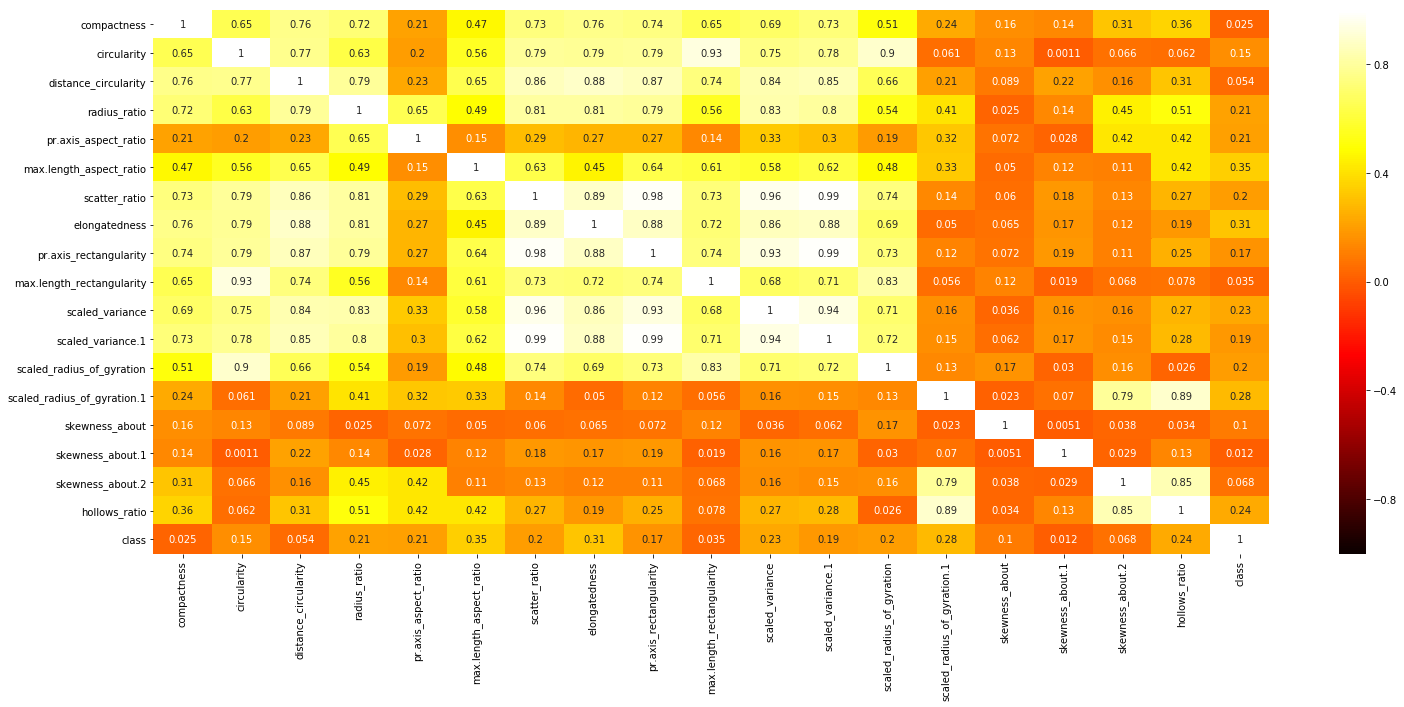

In [132]:
plt.figure(figsize=(25,10))
sns.heatmap(cordata,cmap='hot', vmax=1,vmin=-1, annot=True)
#create a heatmap
#vmax and vmin is for a standardized legend from -1 to +1

In [133]:
# We can drop Skewness About 1 as it seems to have a very low correlation with the Target Variable
mydata2 = mydata2.drop('skewness_about.1', axis=1)

# Covariance Matrix

In [134]:
mydata_cov=np.cov(mydata2.T)
mydata_cov

array([[ 1.00118343,  0.65521328,  0.76275056,  0.72575913,  0.21271251,
         0.47435705,  0.73544659, -0.7655713 ,  0.74554662,  0.6520155 ,
         0.69144287,  0.73439137,  0.51452439, -0.23640089,  0.15640147,
         0.31522356,  0.36024383, -0.02469271],
       [ 0.65521328,  1.00118343,  0.7691726 ,  0.63130248,  0.2022629 ,
         0.56217168,  0.79190652, -0.78919199,  0.79371413,  0.93085371,
         0.75396722,  0.77700108,  0.89774147,  0.06150677,  0.1303604 ,
        -0.06565062,  0.06245533, -0.15455181],
       [ 0.76275056,  0.7691726 ,  1.00118343,  0.79438214,  0.23218163,
         0.64699443,  0.86569014, -0.88547644,  0.86712372,  0.74025042,
         0.83944245,  0.85407306,  0.65775539, -0.21016862,  0.08895609,
         0.15753137,  0.31439368, -0.05446836],
       [ 0.72575913,  0.63130248,  0.79438214,  1.00118343,  0.6509069 ,
         0.48559746,  0.80932744, -0.81124799,  0.79148953,  0.55940539,
         0.83206355,  0.80560429,  0.53693773, -0.407

## Eigen Values and Vectors

In [136]:
eig_vals, eig_vecs = np.linalg.eig(mydata_cov)
print("Eigen Values:", eig_vals)
print("Eigen Vectors:" , eig_vecs)

Eigen Values: [9.60780382e+00 3.14780664e+00 1.56780319e+00 1.00218663e+00
 7.36414923e-01 5.11136027e-01 4.32034692e-01 2.36053527e-01
 2.11005783e-01 1.45163627e-01 8.91499537e-03 1.34059237e-02
 1.01528388e-01 8.97103994e-02 3.77902127e-02 4.70717182e-02
 6.11305944e-02 6.43406823e-02]
Eigen Vectors: [[-2.61495601e-01  5.70126619e-02  6.25246691e-02  1.33963171e-01
  -2.84940263e-01  3.68679759e-01 -4.94618959e-01  5.21321912e-03
  -4.43879853e-01  4.61588508e-01  8.91799536e-03  9.60335625e-03
   1.15525986e-01 -4.45335977e-02 -1.17189202e-01  4.00093214e-03
  -7.31892214e-02 -4.77789738e-03]
 [-2.78332499e-01 -1.80225339e-01  8.33903121e-02  3.93362763e-02
   2.29532171e-01  3.39646252e-01  1.42446399e-01  2.01065934e-02
   6.37792220e-02 -3.35427254e-02 -1.20842986e-02 -2.07365246e-02
  -1.84292912e-01 -2.24174699e-03 -1.63210214e-01 -7.65664622e-01
   1.85686845e-01 -7.55736940e-02]
 [-2.96277463e-01 -7.35469954e-03  7.70264625e-02 -3.84536381e-02
  -1.51682605e-01  1.58117358e-

## Sort the values. We need to choose the top eigen values (as it explains the most variance) and the corresponding vectors associated with that.
## It makes sense to treat eigen vectors & values as pairs and then sort them. Sort the eigen pairs array using the first column (Eigen value)

In [137]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print("Eigen Pairs:" , eig_pairs)

Eigen Pairs: [(9.607803823156026, array([-0.2614956 , -0.2783325 , -0.29627746, -0.28282341, -0.12084716,
       -0.21757042, -0.31050544,  0.29507861, -0.30861766, -0.26287091,
       -0.30192219, -0.30791163, -0.25155574,  0.07239341, -0.03264768,
       -0.07113726, -0.11706189,  0.0478769 ])), (3.1478066386573516, array([ 0.05701266, -0.18022534, -0.0073547 ,  0.1611322 ,  0.23312682,
        0.08301607, -0.04557391,  0.08267471, -0.05518168, -0.16758318,
       -0.02963045, -0.03678418, -0.22331122, -0.50901211, -0.0148083 ,
        0.49495647,  0.49987671,  0.17521278])), (1.5678031935680619, array([ 0.06252467,  0.08339031,  0.07702646, -0.2180504 , -0.40646587,
        0.40935695, -0.03297295,  0.12869028, -0.00284641,  0.18609285,
       -0.08821981, -0.03396727,  0.05249872, -0.09540862,  0.27143476,
       -0.1191346 ,  0.06644991,  0.66143941])), (1.0021866267548944, array([ 0.13396317,  0.03933628, -0.03845364,  0.02594957,  0.01555638,
       -0.27499009, -0.05476028, -0.

## Explained Variance

In [138]:
eig_tot = sum(eig_vals)#[np.sum(eig_vals) for arr in eig_vals] # [np.sum(arr) for arr in data]
print(eig_tot)
#sum(v for k, v in eig_vals.items() if 'W' in k)
eig_var = [(arr/eig_tot)*100 for arr in eig_vals] # [np.sum(arr) for arr in data]
print(eig_var)

18.021301775147922
[53.313594894712665, 17.467143483487412, 8.699722212798875, 5.5611222721820734, 4.086358088115089, 2.83628803836051, 2.397355625991111, 1.3098583574985576, 1.170868708321925, 0.8055113241491265, 0.04946920862361477, 0.07438931894567177, 0.5633798809633537, 0.497801993079925, 0.2096974634961613, 0.26120043238587815, 0.33921297765190556, 0.35702571923615734]


<Container object of 18 artists>

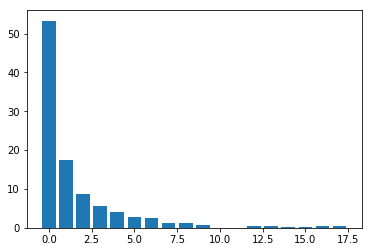

In [139]:
plt.bar(range(18), eig_var)

# Factor Analysis

In [151]:
from sklearn.decomposition import FactorAnalysis as fa
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [152]:
famodel = FactorAnalysis(n_components=18, random_state=101).fit(mydata2)
#random state value needs to be provied. not required but there might be deviations if this is not given so give.

In [153]:
print(famodel.components_)   # Each row represents a dimension and each column represents the original columns in order

[[ 0.78612547  0.84492354  0.90617152  0.85412636  0.34155233  0.64559599
   0.96451192 -0.91327309  0.9590843   0.79120375  0.93767237  0.957503
   0.76746828 -0.18340102  0.08500834  0.18110278  0.31758964 -0.16991362]
 [-0.1291121   0.28276391 -0.02577473 -0.31027005 -0.39119873 -0.13641913
   0.03525952 -0.08981088  0.05301104  0.26862068  0.00589543  0.02117804
   0.35666028  0.85166941  0.02367317 -0.83446719 -0.84066297 -0.24083708]
 [-0.06125179 -0.17371938 -0.08185459  0.1901253   0.30461991 -0.45957258
   0.04951209 -0.14124381  0.02235632 -0.28805512  0.10802415  0.05508806
  -0.13050996  0.15111478 -0.18186488  0.06698694 -0.13750012 -0.63515087]
 [ 0.06353058  0.22277195 -0.02376692  0.12095723  0.30195133 -0.15370288
  -0.11490305 -0.03885671 -0.12474146  0.21534582 -0.09237649 -0.12581162
   0.20740009  0.00511971  0.11376754  0.12325379  0.03422442 -0.16740685]
 [ 0.26246402 -0.02456832  0.11281193 -0.02182959 -0.26522708 -0.15164962
  -0.03349914 -0.13128236 -0.0185561

In [154]:
df_factors = pd.DataFrame(famodel.components_,columns=mydata2.columns.values)

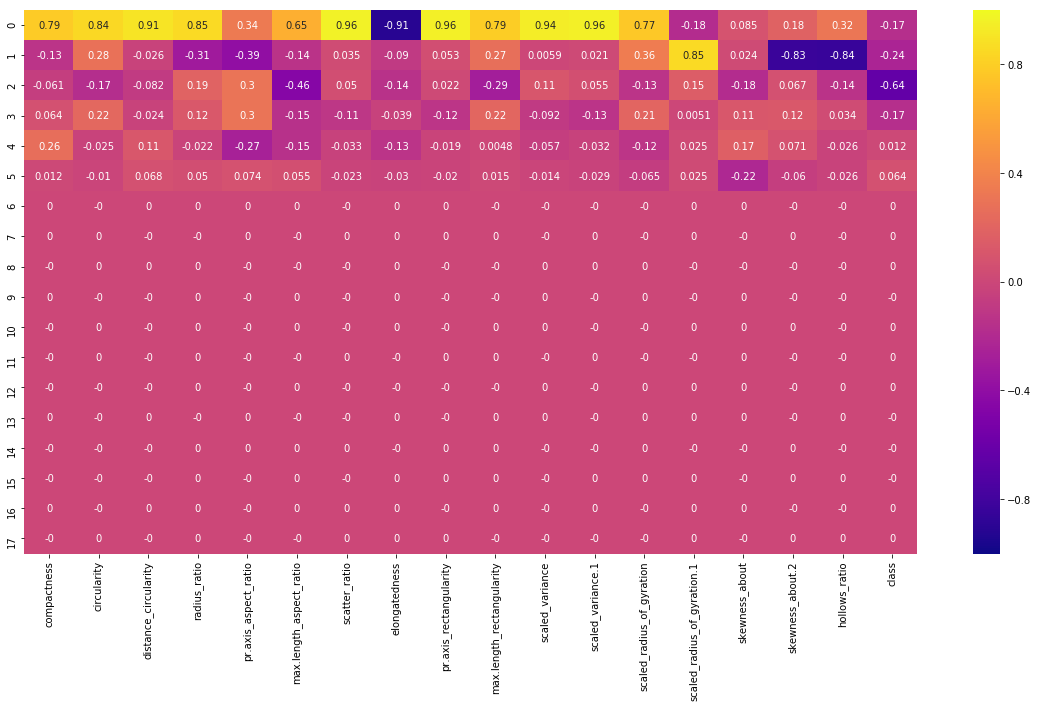

In [155]:
plt.figure(figsize=(20,10))
sns.heatmap(df_factors,cmap='plasma', annot=True, vmin=-1,vmax=1)

### Shortlist 1st 6 factors based on heatmap

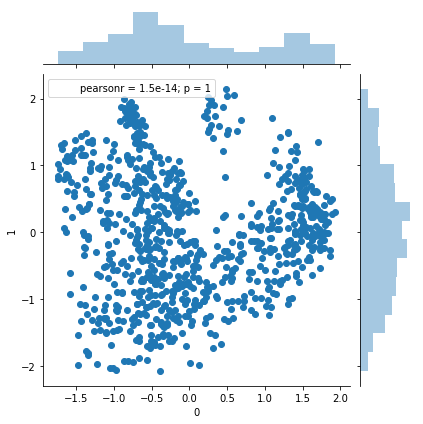

In [156]:
transform = famodel.transform(mydata2)
transform = pd.DataFrame(transform)
sns.jointplot(0,1,data=transform)

# PCA Model

In [158]:
pcamodel = PCA(n_components=17)
pcamodel.fit(mydata2)


PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [159]:
print(pcamodel.components_)   # Each row represents a component and each column represents the original columns in order
#printing the components outputs
#each row represents a component
#each column represents a variable
#each value represents a factor loading value


[[ 2.61495601e-01  2.78332499e-01  2.96277463e-01  2.82823409e-01
   1.20847159e-01  2.17570415e-01  3.10505443e-01 -2.95078606e-01
   3.08617658e-01  2.62870915e-01  3.01922190e-01  3.07911633e-01
   2.51555740e-01 -7.23934141e-02  3.26476779e-02  7.11372594e-02
   1.17061885e-01 -4.78769010e-02]
 [-5.70126619e-02  1.80225339e-01  7.35469954e-03 -1.61132200e-01
  -2.33126820e-01 -8.30160720e-02  4.55739142e-02 -8.26747059e-02
   5.51816783e-02  1.67583176e-01  2.96304484e-02  3.67841753e-02
   2.23311217e-01  5.09012109e-01  1.48082961e-02 -4.94956467e-01
  -4.99876709e-01 -1.75212780e-01]
 [-6.25246691e-02 -8.33903121e-02 -7.70264625e-02  2.18050397e-01
   4.06465869e-01 -4.09356948e-01  3.29729487e-02 -1.28690281e-01
   2.84641483e-03 -1.86092853e-01  8.82198129e-02  3.39672737e-02
  -5.24987218e-02  9.54086162e-02 -2.71434764e-01  1.19134604e-01
  -6.64499101e-02 -6.61439411e-01]
 [ 1.33963171e-01  3.93362763e-02 -3.84536381e-02  2.59495695e-02
   1.55563750e-02 -2.74990091e-01 -5.

In [160]:
df_comp = pd.DataFrame(pcamodel.components_,columns=mydata2.columns.values)
df_comp = abs(df_comp)
df_comp
#storing the values in a dataframe
#takes the column names from the original dataframe for simplicity

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.2,hollows_ratio,class
0,0.261496,0.278332,0.296277,0.282823,0.120847,0.217570,0.310505,0.295079,0.308618,0.262871,0.301922,0.307912,0.251556,0.072393,0.032648,0.071137,0.117062,0.047877
1,0.057013,0.180225,0.007355,0.161132,0.233127,0.083016,0.045574,0.082675,0.055182,0.167583,0.029630,0.036784,0.223311,0.509012,0.014808,0.494956,0.499877,0.175213
2,0.062525,0.083390,0.077026,0.218050,0.406466,0.409357,0.032973,0.128690,0.002846,0.186093,0.088220,0.033967,0.052499,0.095409,0.271435,0.119135,0.066450,0.661439
3,0.133963,0.039336,0.038454,0.025950,0.015556,0.274990,0.054760,0.044337,0.053818,0.005686,0.057252,0.050166,0.087492,0.010136,0.908632,0.153008,0.003332,0.178923
4,0.284940,0.229532,0.151683,0.082900,0.693923,0.196573,0.131146,0.205072,0.140443,0.234012,0.109710,0.141894,0.327537,0.052256,0.068100,0.120627,0.000400,0.144790
5,0.368680,0.339646,0.001581,0.055299,0.174678,0.283163,0.236231,0.068122,0.227858,0.439318,0.258208,0.247656,0.173824,0.032743,0.283951,0.282205,0.081814,0.057825
6,0.494619,0.142446,0.152602,0.230087,0.349305,0.170862,0.068772,0.143112,0.024783,0.074469,0.077950,0.049080,0.325960,0.299057,0.007872,0.109646,0.225770,0.457197
7,0.005213,0.020107,0.406551,0.095948,0.013118,0.472838,0.187060,0.202604,0.193815,0.119067,0.207711,0.266238,0.352824,0.067656,0.092654,0.232357,0.036189,0.408138
8,0.443880,0.063779,0.470577,0.203603,0.080943,0.433239,0.096592,0.277905,0.113732,0.095944,0.041326,0.101488,0.164750,0.304660,0.014498,0.168630,0.050708,0.264332
9,0.461589,0.033543,0.128002,0.088457,0.007294,0.022087,0.032923,0.202746,0.018176,0.254262,0.043053,0.038756,0.296295,0.516066,0.039741,0.525538,0.054037,0.125425


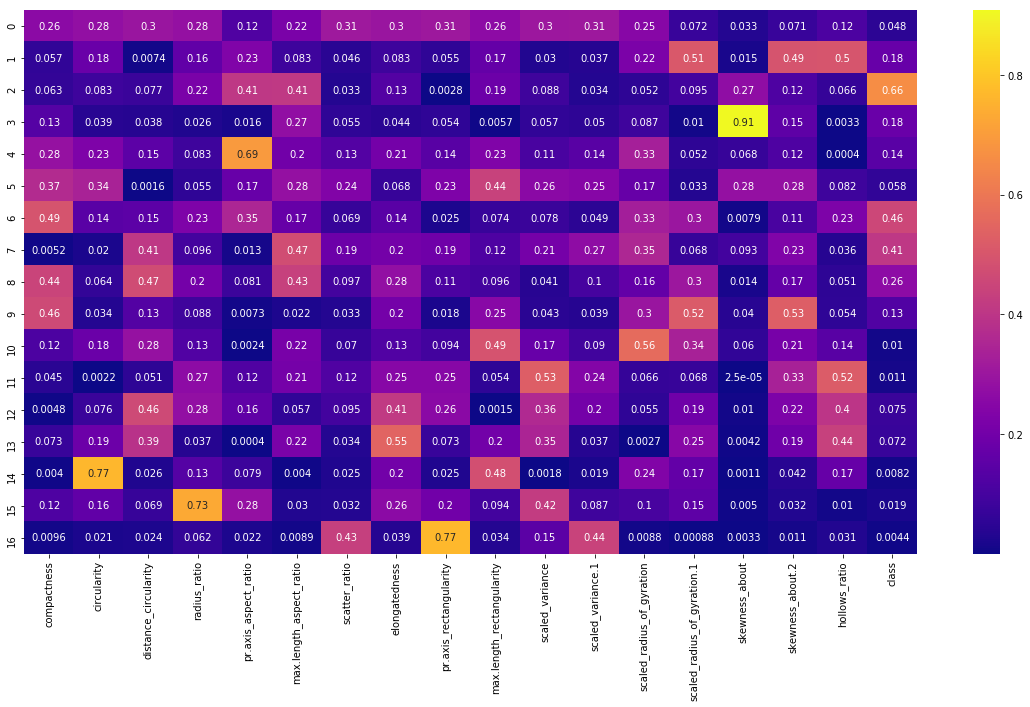

In [161]:
import seaborn as sns

plt.figure(figsize=(20,10)) #sets the boundary in inches
sns.heatmap(df_comp,cmap='plasma', annot=True) #annot provides the value within the boxes
#heatmap for the values
#seaborn used for heatmap
#yellow or violet has good loading for variable
#fa-kit package is outdated

In [162]:
var = pcamodel.explained_variance_
#extracted the explained variance which is the absolute variance value
# can extract te explained variance ratio in pcamodel
#we can use both expained variance and also the ratio to plot the scree plot

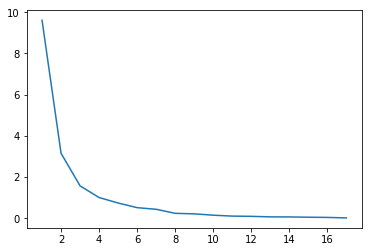

In [163]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], var )
#3 components make sense

In [164]:
pcamodel.transform(mydata2)
#calculate the factor score using transform function
#calculates the equation

array([[ 6.69156906e-01, -6.87891339e-01, -8.76066098e-01, ...,
        -1.32882005e-01, -2.14031062e-01,  8.49625930e-04],
       [-1.54876441e+00, -6.32414114e-01, -1.87385352e+00, ...,
        -1.99078744e-02, -1.28902552e-01,  1.78632650e-02],
       [ 4.32439693e+00,  5.38540537e-01, -4.28438054e-01, ...,
        -1.49912529e-01, -9.68798579e-03,  1.80179576e-01],
       ...,
       [ 5.68105242e+00,  5.93410114e-02, -1.83322104e-01, ...,
        -1.49398649e-03,  1.76352643e-01, -3.36698552e-02],
       [-3.39802192e+00, -1.26378700e+00,  3.64910482e-01, ...,
        -4.63494427e-02,  1.77293113e-01,  4.43700748e-02],
       [-5.29263354e+00, -1.47756194e-01, -6.92043101e-01, ...,
         1.62223733e-01,  2.65809997e-01,  9.82143418e-02]])

# SVM Analysis

In [178]:
#Split into Target and Independant variables
ind_df = mydata2.drop('class', axis=1)
X = ind_df.values
Y = mydata1['class'].values

In [181]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [182]:
from sklearn import svm
#clf = svm.SVC(gamma=0.025, C=10)    
clf = svm.SVC()    
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
clf.fit(X_train , Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [183]:
y_pred=clf.predict(X_test)

In [184]:
clf.score(X_test, Y_test)

0.9606299212598425

In [185]:
clf.score(X_train, Y_train)

0.964527027027027

In [197]:
print(metrics.confusion_matrix(Y_test, y_pred))
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

[[ 66   0   0]
 [  2 121   4]
 [  0   4  57]]
SVM Cross-validated scores: [1.         1.         0.84615385 0.88461538 0.96153846 0.92307692
 0.84       0.875      0.95833333 0.95833333]


# C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf

In [198]:
clf = svm.SVC(C=0.01, kernel='linear')    
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

Test Scores: 0.9015748031496063
Train Scores: 0.8699324324324325
[[ 58   7   1]
 [  8 111   8]
 [  1   0  60]]
SVM Cross-validated scores: [0.96296296 0.84615385 0.80769231 0.65384615 0.84615385 0.76923077
 0.56       0.875      0.83333333 1.        ]


In [199]:
clf = svm.SVC(C=0.05, kernel='linear')    
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

Test Scores: 0.8976377952755905
Train Scores: 0.9037162162162162
[[ 59   7   0]
 [ 10 112   5]
 [  0   4  57]]
SVM Cross-validated scores: [1.         0.88461538 0.80769231 0.84615385 0.92307692 0.92307692
 0.72       0.875      0.91666667 0.95833333]


In [200]:
clf = svm.SVC(C=0.5, kernel='linear')    
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

Test Scores: 0.9094488188976378
Train Scores: 0.9341216216216216
[[ 58   7   1]
 [  6 117   4]
 [  0   5  56]]
SVM Cross-validated scores: [1.         0.84615385 0.80769231 0.80769231 1.         0.92307692
 0.76       0.91666667 0.95833333 0.95833333]


In [201]:
clf = svm.SVC(C=1, kernel='linear')    
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

Test Scores: 0.9173228346456693
Train Scores: 0.9408783783783784
[[ 57   8   1]
 [  4 121   2]
 [  0   6  55]]
SVM Cross-validated scores: [1.         0.80769231 0.80769231 0.76923077 1.         0.88461538
 0.76       0.875      1.         0.95833333]


In [202]:
clf = svm.SVC(C=0.01, kernel='rbf')    
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

Test Scores: 0.5
Train Scores: 0.5101351351351351
[[  0  66   0]
 [  0 127   0]
 [  0  61   0]]
SVM Cross-validated scores: [0.48148148 0.5        0.5        0.5        0.5        0.5
 0.52       0.5        0.5        0.5       ]


In [203]:
clf = svm.SVC(C=0.05, kernel='rbf')    
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

Test Scores: 0.7362204724409449
Train Scores: 0.7347972972972973
[[ 38  28   0]
 [  1 126   0]
 [  2  36  23]]
SVM Cross-validated scores: [0.48148148 0.5        0.5        0.5        0.5        0.5
 0.52       0.5        0.5        0.5       ]


In [204]:
clf = svm.SVC(C=0.5, kernel='rbf')    
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

Test Scores: 0.9645669291338582
Train Scores: 0.9493243243243243
[[ 66   0   0]
 [  2 122   3]
 [  0   4  57]]
SVM Cross-validated scores: [1.         0.96153846 0.84615385 0.80769231 0.96153846 0.88461538
 0.84       0.91666667 0.95833333 0.95833333]


In [205]:
clf = svm.SVC(C=1, kernel='rbf')    
clf.fit(X_train , Y_train)
y_pred=clf.predict(X_test)
print("Test Scores:", clf.score(X_test, Y_test))
print("Train Scores:", clf.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, y_pred))
scores = cross_val_score(clf, X_test , Y_test, cv=10)
print('SVM Cross-validated scores:', scores)

Test Scores: 0.9606299212598425
Train Scores: 0.964527027027027
[[ 66   0   0]
 [  2 121   4]
 [  0   4  57]]
SVM Cross-validated scores: [1.         1.         0.84615385 0.88461538 0.96153846 0.92307692
 0.84       0.875      0.95833333 0.95833333]


# Best Hyper Parameters Kernel = RBF and C=0.5